<a href="https://colab.research.google.com/github/Dante1902/Tort-Al/blob/main/%D0%9F%D0%BE%D0%B3%D0%BE%D0%B4%D0%BD%D1%8B%D0%B5%D0%A3%D1%81%D0%BB%D0%BE%D0%B2%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import plotly.express as px

In [2]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')

In [3]:
print("Форма данных (shape):", df.shape)
print("\nПервые пять строк данных (head):")
print(df.head())
print("\nСтатистика по данным (describe):")
print(df.describe())
print("\nИнформация о данных (info):")
print(df.info())

Форма данных (shape): (1462, 5)

Первые пять строк данных (head):
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

Статистика по данным (describe):
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.3333

In [4]:
# Подсчет количества пустых значений с помощью библиотеки numpy
print("\nКоличество пустых значений в каждом признаке:")
print(np.sum(df.isnull()))


Количество пустых значений в каждом признаке:
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [5]:
# Гистограммы распределения данных
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Frequency')

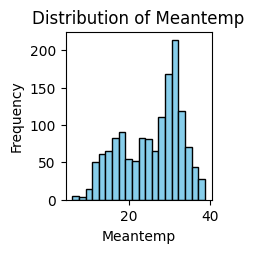

In [6]:
# Гистограмма для 'meantemp'
plt.subplot(2, 3, 1)
plt.hist(df['meantemp'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Meantemp')
plt.xlabel('Meantemp')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

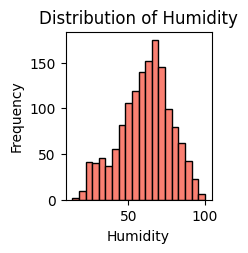

In [7]:
# Гистограмма для 'humidity'
plt.subplot(2, 3, 2)
plt.hist(df['humidity'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

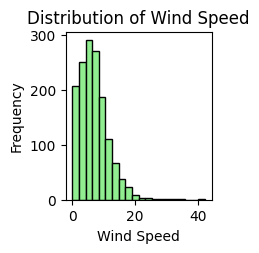

In [8]:
# Гистограмма для 'wind_speed'
plt.subplot(2, 3, 3)
plt.hist(df['wind_speed'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

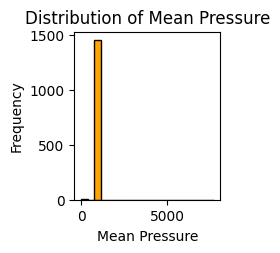

In [9]:
# Гистограмма для 'meanpressure'
plt.subplot(2, 3, 4)
plt.hist(df['meanpressure'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Mean Pressure')
plt.xlabel('Mean Pressure')
plt.ylabel('Frequency')

In [10]:
plt.tight_layout()
plt.show()

# Графики распределения данных
plt.figure(figsize=(15, 5))

<Figure size 640x480 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<ipython-input-11-db8dd0e7c157>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['meantemp'], shade=True, color='skyblue')


Text(0.5, 1.0, 'Distribution of Meantemp')

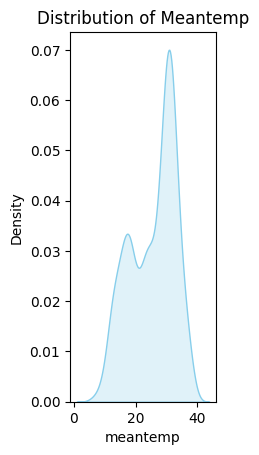

In [11]:
# График распределения 'meantemp'
plt.subplot(1, 3, 1)
sns.kdeplot(df['meantemp'], shade=True, color='skyblue')
plt.title('Distribution of Meantemp')

<ipython-input-12-cc37d7e91a92>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['humidity'], shade=True, color='salmon')


Text(0.5, 1.0, 'Distribution of Humidity')

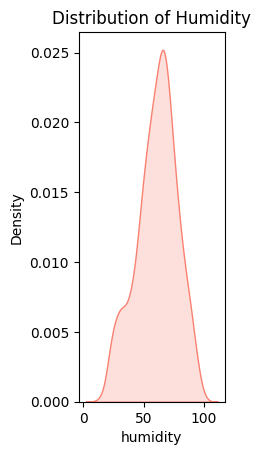

In [12]:
# График распределения 'humidity'
plt.subplot(1, 3, 2)
sns.kdeplot(df['humidity'], shade=True, color='salmon')
plt.title('Distribution of Humidity')

<ipython-input-13-fd65b2f76122>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['wind_speed'], shade=True, color='lightgreen')


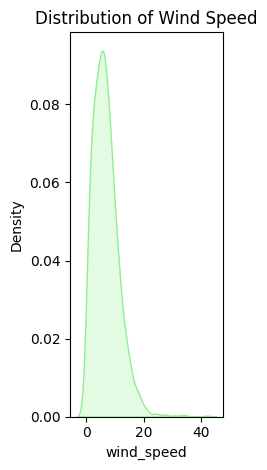

In [13]:
# График распределения 'wind_speed'
plt.subplot(1, 3, 3)
sns.kdeplot(df['wind_speed'], shade=True, color='lightgreen')
plt.title('Distribution of Wind Speed')

plt.tight_layout()
plt.show()

In [14]:
# Ящики с усами (диаграммы размаха)
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Boxplot of Meantemp')

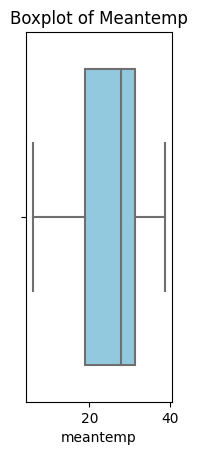

In [15]:
# Ящик с усами для 'meantemp'
plt.subplot(1, 3, 1)
sns.boxplot(x=df['meantemp'], color='skyblue')
plt.title('Boxplot of Meantemp')

Text(0.5, 1.0, 'Boxplot of Humidity')

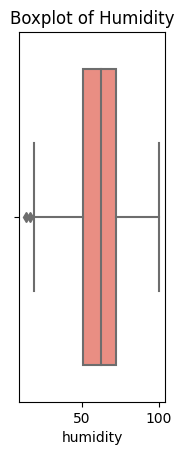

In [16]:
# Ящик с усами для 'humidity'
plt.subplot(1, 3, 2)
sns.boxplot(x=df['humidity'], color='salmon')
plt.title('Boxplot of Humidity')

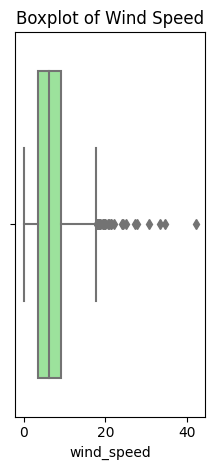

In [17]:
# Ящик с усами для 'wind_speed'
plt.subplot(1, 3, 3)
sns.boxplot(x=df['wind_speed'], color='lightgreen')
plt.title('Boxplot of Wind Speed')

plt.tight_layout()
plt.show()

In [18]:
# Кластеризация данных (пример, можно использовать KMeans)
from sklearn.cluster import KMeans

In [19]:
# Выберем нужные признаки для кластеризации (пример)
features_for_clustering = df[['meantemp', 'humidity', 'wind_speed']]

# Нормализация данных
scaler = StandardScaler()
features_for_clustering_scaled = scaler.fit_transform(features_for_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


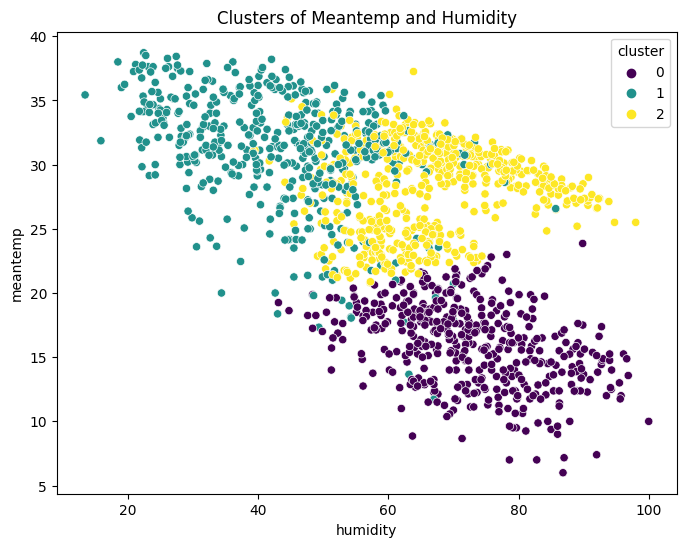

In [20]:
# Определение количества кластеров (пример)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_for_clustering_scaled)

# Визуализация кластеров (пример)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='humidity', y='meantemp', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of Meantemp and Humidity')
plt.show()

In [21]:
# Обучение модели XGBoost Regressor
from xgboost import XGBRegressor

# Выбор признаков и целевой переменной
X = df[['humidity', 'wind_speed']]
y = df['meantemp']

In [22]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = XGBRegressor()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

R-squared: 0.019772127084674795


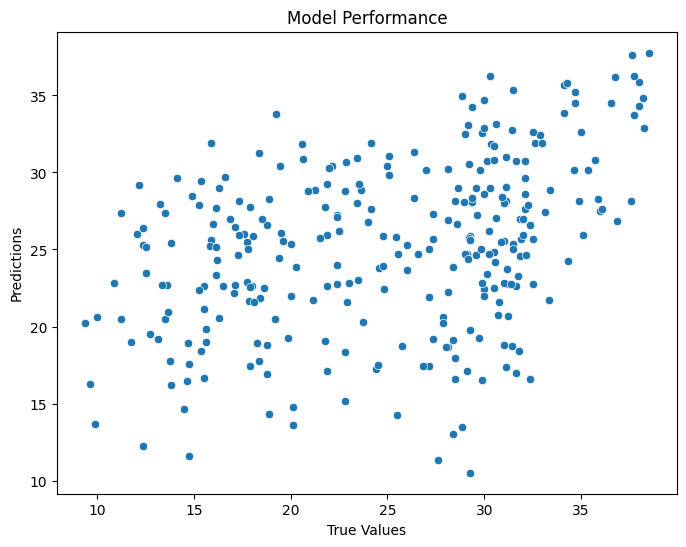

In [23]:
# Оценка точности модели с использованием r squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Визуализация точности работы модели
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Model Performance')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()